01-Portland-missing.csv
Number of Years to Skip =  12
02-Boston-missing.csv
Number of Years to Skip =  3
03-Newport-missing.csv
Number of Years to Skip =  9
04-Montauk-missing.csv
Number of Years to Skip =  19
05-The Battery-missing.csv
Number of Years to Skip =  10
06-Sandy Hook-missing.csv
Number of Years to Skip =  8
07-Atlantic City-missing.csv
Number of Years to Skip =  8
08-Sewells Pt-missing.csv
Number of Years to Skip =  3
09-Wilmington NC-missing.csv
Number of Years to Skip =  4
10-Charleston SC-missing.csv
Number of Years to Skip =  5
11-Fernandina Beach-missing.csv
Number of Years to Skip =  8
12-Key West-missing.csv
Number of Years to Skip =  3


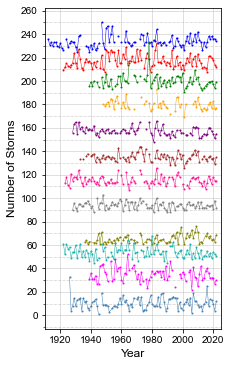

In [5]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import shutil
import numpy as np
from scipy.stats import linregress



plt.rcParams["font.family"] = "Arial"

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 80
fig_height_mm = 150

fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch

# Create the figure with the specified size in millimeters
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
dir_path = os.path.join(parent_dir, 'Annual_SEPI_Results')
missing_dir_path = os.path.join(parent_dir, 'Results_Missing_Data')

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
missing_file_names = [f for f in os.listdir(missing_dir_path) if f.endswith('.csv')]

output_path = os.path.join(current_dir, "annual_storms_plots.jpeg")

# Set the vertical offset
vertical_offset = 220

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'deeppink', 'gray', 'olive', 'lightseagreen', 'magenta', 'steelblue']
file_names = sorted(file_names)
missing_file_names = sorted(missing_file_names) 

#label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy Hook", "Atlantic City", "Sewell's Point", "Willmington", "Charleston", "Fernandina Beach", "Key West"]
label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy H.", "Atlantic C.", "Sewell's P.", "Willmington", "Charleston", "Fernand. B.", "Key West"]


for i, file_name in enumerate(file_names):
    print(missing_file_names[i])
    m_file_name = missing_file_names[i]
    
    # Load the CSV file into a pandas dataframe
    df = pd.read_csv(os.path.join(dir_path, file_name))
    mdf = pd.read_csv(os.path.join(missing_dir_path, m_file_name))

    # Clean the column names
    df.columns = df.columns.str.strip()
    mdf.columns = mdf.columns.str.strip()

    total_num_points = 8760
    thr = 0.1 * 8760        # Only keep if 90% of the data is present
    mdf["Threshold"] = mdf["# of Missing points"].apply(lambda x: True if x < thr else False)

    # Create a new column in the dataframe to mark missing data as NaN
    df.loc[df['Year'].isin(mdf[mdf['Threshold'] == False]['Year']), 'Number of Storms'] = np.nan

    # Create a plot with the modified data
    plt.plot(df['Year'], df['Number of Storms'] + vertical_offset, color=colors[i % len(colors)], marker='o', markersize=1.0, linewidth=0.5, label=label_list[i], linestyle="-")
    
    # Print labels next to the data points
    #x_label = 2030
    #y_label = vertical_offset + 12
    #plt.text(x_label, y_label, label_list[i], color=colors[i % len(colors)], fontsize=8)
        
    # Linear fit analysis
    # Create an empty list to store the years that satisfy the condition
    years_to_skip = []

    # Iterate through the DataFrame and check the condition
    for index, row in mdf.iterrows():
        if row['Threshold'] is False:
            years_to_skip.append(row['Year'])
            
    print("Number of Years to Skip = ", len(years_to_skip))
    df_filtered = df[~df['Year'].isin(years_to_skip)]
    
    # Add linear trendline and equation
    x = df_filtered['Year']
    y = df_filtered['Number of Storms']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    
    # Calculate linear regression and p-value using scipy.stats.linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Print equation and p-value
    #print("Trendline: y = {:.2f}x + {:.2f}".format(slope, intercept))
    #print("P-value for slope coefficient:", p_value)

    # Plot trendlines
    #label_text = "m = {:.4f}, p = {:.4f}, r = {:.4f}, st err = {:.4f}".format(slope, p_value, r_value, std_err)
    #print("y={:.2f}x+{:.2f}".format(z[0], z[1]))
    #plt.plot(x, p(x)+ vertical_offset, "k--", linewidth=2)
    # Print labels next to the data points
    #x_label = 2070
    #y_label = vertical_offset + 12
    #plt.text(x_label, y_label, label_text, color=colors[i % len(colors)], fontsize=8)
    
    
    vertical_offset -= 20

plt.grid(True, which='major', axis='x', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))

# Set the major grid lines for y ax
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))

# Set the minor grid lines for the y-axis
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))


plt.xlim(1910,2025)

xticks = [1920, 1940, 1960, 1980, 2000, 2020]
plt.xticks(xticks)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Storms", fontsize=12)

plt.tick_params(axis='both', labelsize=10)
plt.savefig(output_path, dpi=1000, bbox_inches='tight')

plt.show()
plt.close()